In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
from matplotlib_venn import venn2
from matplotlib_venn import venn3
#for my windows computer I had to install this package using pip rather than anaconda.  I got this error message: 
#twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Added C:\Users\BMH_work\github\expression_broad_data to path: 
['', 'C:\\Users\\BMH_work\\github\\expression_broad_data\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\lib', 'C:\\Users\\BMH_work\\Anaconda3', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\BMH_work\\.ipython', 'C:\\Users\\BMH_work\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other

In [2]:
##Compare LFC between last year and this year for AS + 1/NMPP1

#Load DEseq data for AS +/- drug

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_KL_AS_nmpp1.csv'), index_col=0)

#Load DEseq data from 2017 for AS +/-drug

pkainh_deseq_2017 = pd.read_csv(os.path.normpath(data_processing_dir + '\\20170817_klscpka\\20170817_klscpka_DESEQ_YPD_t40_ASMinvASPlus_KL.csv'), index_col=0)

pkainh_deseq_merged = pkainh_deseq.merge(pkainh_deseq_2017, left_index=True, right_index=True, how = 'outer', suffixes = ('','_2017')) 

#remove underscore from kl genenames
pkainh_deseq_merged['kl_genename'] = io_library.kl_genename_convert_list(list(pkainh_deseq_merged.index))
pkainh_deseq_merged.set_index('kl_genename', inplace=True)

#Add column for common names
pkainh_deseq_merged['SC_common_name'] = io_library.SC_common_name_lookup_KL(pkainh_deseq_merged.index)

for column in ['log2FoldChange', 'log2FoldChange_2017']: 
    pkainh_deseq_merged[column] = pkainh_deseq_merged[column].fillna(0.0)

In [3]:
spec = 'KL'

data = []

xlabel = 'LFC AS -/+ Nmpp1 2017'
ylabel = 'LFC AS -/+ Nmpp1'

trace = pygo.Scatter(
            x = pkainh_deseq_merged['log2FoldChange_2017'], 
            y =  pkainh_deseq_merged['log2FoldChange'],
            text = pkainh_deseq_merged['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= spec + '_AS_pmNMPP1_2017LFC_V2018')

In [9]:
#Load DEseq data for K.Lac Rph1/Gis1 delete experiment

spec = 'KL'

r1g1_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec + '_AS_wtVr1g1.csv'), index_col=0)

r1g1_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(r1g1_deseq.index))
r1g1_deseq.set_index('kl_genename', inplace=True)

r1g1_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(r1g1_deseq.index)

#Load DEseq data for SCer Msn24/drug interaction contrast
m24_nmpp1_int_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec +  '_AS_m24del_nmpp1_interaction.csv'), index_col=0)

m24_nmpp1_int_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(m24_nmpp1_int_deseq.index))
m24_nmpp1_int_deseq.set_index('kl_genename', inplace=True)

#Add column for common names
m24_nmpp1_int_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(m24_nmpp1_int_deseq.index)

#Load DEseq data for SCer Msn2/4 delete in WT experiment

m24_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_' + spec + '_AS_wtVm24.csv'), index_col=0)
m24_deseq['kl_genename'] = io_library.kl_genename_convert_list(list(m24_deseq.index))
m24_deseq.set_index('kl_genename', inplace=True)


#Add column for common names
m24_deseq['SC_common_name'] = io_library.SC_common_name_lookup_KL(m24_deseq.index)



In [29]:
#Plot Deseq LFC v.s. pValue

#Plot raw expression for various gene sets

# hover_text = []
# for ind, row in kl_sc_PKA_data.iterrows():
#     hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}').format(
#                               SC_common_name=row['SC_common_name'],
#                               klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
#                               klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL']
#                               ))

# kl_sc_PKA_data['hover'] = hover_text

# cmap = cm.get_cmap('tab10')

data = []

trace = pygo.Scatter(
            x = r1g1_deseq['log2FoldChange'], 
            y =  -np.log10(r1g1_deseq['pvalue']),
            text = r1g1_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_KL_WT_VS_R1G1')




In [30]:
#To Call Rph1/Gis1 repressed genes make a line from (1.5, 3) to (3.0, 0) and a hard cutoff below of 0.5

x1,y1 = (1.3,7.0)
x2,y2 = (2.2,0.0)
ymin = 0.5

x = r1g1_deseq['log2FoldChange']
y =  -np.log10(r1g1_deseq['pvalue'])

r1g1_rep_genes = r1g1_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]
len(r1g1_rep_genes)

63

In [14]:
#Plot Msn24/nmpp1 interaction LFC v.s. pValue

spec = 'KL'

data = []

trace = pygo.Scatter(
            x = m24_nmpp1_int_deseq['log2FoldChange'], 
            y =  -np.log10(m24_nmpp1_int_deseq['pvalue']),
            text = m24_nmpp1_int_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Msn24 drug interaction term'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= spec + ' RNAseq2018_Msn24_drug_interaction')


In [16]:
#To Call Msn2/4 PKA interaction genes make a line and a hard cutoff for -log10p values

x1,y1 = (-2.5,0.0)
x2,y2 = (-1.1,2.2)
ymin = 0.3

x = m24_nmpp1_int_deseq['log2FoldChange']
y =  -np.log10(m24_nmpp1_int_deseq['pvalue'])

m24_nmpp1_act_genes = m24_nmpp1_int_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]
len(m24_nmpp1_act_genes)

96

In [18]:
#Plot Deseq LFC v.s. pValue

#Plot raw expression for various gene sets

# hover_text = []
# for ind, row in kl_sc_PKA_data.iterrows():
#     hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}').format(
#                               SC_common_name=row['SC_common_name'],
#                               klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
#                               klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL']
#                               ))

# kl_sc_PKA_data['hover'] = hover_text

# cmap = cm.get_cmap('tab10')

data = []

trace = pygo.Scatter(
            x = m24_deseq['log2FoldChange'], 
            y =  -np.log10(m24_deseq['pvalue']),
            text = m24_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'WT VS Msn2/4 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= spec + 'RNAseq2018_WT_VS_M24_KL')


In [20]:
#To Call Msn2/4 deletion genes make a line from (-2.3,0.5) to (-1.3,1.5) and a hard cutoff for -log10p value of above 0.5. 
#This was chosen to include CYC7 and HOR7 but not MPC3. 

x1,y1 = (-2.0,0.0)
x2,y2 = (-1.0,1.98)
ymin = 0.3

x = m24_deseq['log2FoldChange']
y =  -np.log10(m24_deseq['pvalue'])

m24_act_genes = m24_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]
len(m24_act_genes)

28

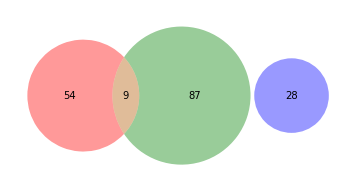

In [37]:
venn3([set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = None) #, set_labels = ['Rph1/Gis1 repressed \n in exp growth', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Activated in \n Msn24 del'])

In [34]:
venn3?

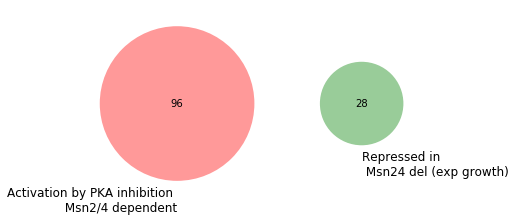

In [40]:
venn2([ set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = [ 'Activation by PKA inhibition \n Msn2/4 dependent', 'Repressed in \n Msn24 del (exp growth)'])

In [27]:
set(m24_act_genes.index)

{'KLLA0A00308r',
 'KLLA0A05665g',
 'KLLA0B09878g',
 'KLLA0B14212r',
 'KLLA0C00242g',
 'KLLA0C12034g',
 'KLLA0C16819g',
 'KLLA0C17886r',
 'KLLA0D03102r',
 'KLLA0D09845r',
 'KLLA0D14465r',
 'KLLA0D15477r',
 'KLLA0D19949g',
 'KLLA0E01079g',
 'KLLA0E03983g',
 'KLLA0E04951r',
 'KLLA0E05611g',
 'KLLA0E12541g',
 'KLLA0E14081r',
 'KLLA0E15005g',
 'KLLA0E15643r',
 'KLLA0E16809r',
 'KLLA0E20505g',
 'KLLA0F03212g',
 'KLLA0F13332g',
 'KLLA0F20097r',
 'KLLA0F24486g',
 'KLLA0F26961g'}

In [26]:
set(m24_nmpp1_act_genes.index)

{'EFG00000981736',
 'EFG00000982152',
 'EFG00000982249',
 'KLLA0A00484g',
 'KLLA0A02585g',
 'KLLA0A02629g',
 'KLLA0A02717g',
 'KLLA0A03289g',
 'KLLA0A04323g',
 'KLLA0A05852g',
 'KLLA0A05987r',
 'KLLA0A07227g',
 'KLLA0A08987r',
 'KLLA0A10087g',
 'KLLA0A11935g',
 'KLLA0B01430r',
 'KLLA0B04477g',
 'KLLA0B05269g',
 'KLLA0B10142g',
 'KLLA0B11946g',
 'KLLA0B12650g',
 'KLLA0B14751g',
 'KLLA0C01177g',
 'KLLA0C02079g',
 'KLLA0C02409g',
 'KLLA0C03938g',
 'KLLA0C04686g',
 'KLLA0C05940g',
 'KLLA0C06490g',
 'KLLA0C06996g',
 'KLLA0C08866g',
 'KLLA0C11781g',
 'KLLA0C16599g',
 'KLLA0C17237g',
 'KLLA0C18722g',
 'KLLA0D02376g',
 'KLLA0D03124r',
 'KLLA0D03410g',
 'KLLA0D03751g',
 'KLLA0D04037g',
 'KLLA0D05907g',
 'KLLA0D07073g',
 'KLLA0D07656g',
 'KLLA0D13046g',
 'KLLA0D16412g',
 'KLLA0D17248g',
 'KLLA0D18172g',
 'KLLA0D18282g',
 'KLLA0D18964g',
 'KLLA0E00419g',
 'KLLA0E00661g',
 'KLLA0E01893g',
 'KLLA0E05875g',
 'KLLA0E06051g',
 'KLLA0E06183g',
 'KLLA0E06711g',
 'KLLA0E07327g',
 'KLLA0E07525g',
 'KLLA0E

In [32]:
set(r1g1_rep_genes.index)

{'EFG00000981672',
 'EFG00000982249',
 'KLLA0A00220g',
 'KLLA0A01320g',
 'KLLA0A11638g',
 'KLLA0A11836g',
 'KLLA0B00451g',
 'KLLA0B01243g',
 'KLLA0B02464g',
 'KLLA0B05533g',
 'KLLA0B07337g',
 'KLLA0B07711g',
 'KLLA0B08349r',
 'KLLA0B12650g',
 'KLLA0C00671g',
 'KLLA0C06886g',
 'KLLA0C08085r',
 'KLLA0C08173g',
 'KLLA0C11121g',
 'KLLA0C11209g',
 'KLLA0C12463g',
 'KLLA0C13882g',
 'KLLA0C14916g',
 'KLLA0C19019g',
 'KLLA0C19041g',
 'KLLA0D00462g',
 'KLLA0D00704g',
 'KLLA0D02464g',
 'KLLA0D05907g',
 'KLLA0D06083g',
 'KLLA0D13046g',
 'KLLA0D17248g',
 'KLLA0D18909g',
 'KLLA0E01563g',
 'KLLA0E07877g',
 'KLLA0E08867g',
 'KLLA0E10539g',
 'KLLA0E10935g',
 'KLLA0E14477g',
 'KLLA0E15203g',
 'KLLA0E15401g',
 'KLLA0E15709g',
 'KLLA0E19493g',
 'KLLA0E21319g',
 'KLLA0E22551g',
 'KLLA0F00682g',
 'KLLA0F01507g',
 'KLLA0F03773g',
 'KLLA0F04059g',
 'KLLA0F04125g',
 'KLLA0F04323g',
 'KLLA0F05335g',
 'KLLA0F08107g',
 'KLLA0F10065g',
 'KLLA0F12056g',
 'KLLA0F20768g',
 'KLLA0F20878g',
 'KLLA0F20900g',
 'KLLA0F22

In [8]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) & set(m24_act_genes.index)))

['GAD1', 'PNC1', 'YOL153C', 'CYC7']

In [39]:
io_library.SC_common_name_lookup_KL(list(set(r1g1_rep_genes.index) & set(m24_nmpp1_act_genes.index)))

['EFG00000982249',
 'PPE1',
 'YLR149C',
 'YKL107W',
 'KLLA0F27203g',
 'UGX2',
 'KLLA0F25520g',
 'SPG4',
 'PFK26']

In [15]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) & set(m24_act_genes.index)))

['EGO4', 'GAD1', 'GPH1', 'HSP12', 'STF2', 'GPX1', 'RTC3', 'SOL4']

In [69]:
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) - set(m24_nmpp1_act_genes.index)))

['MFA1',
 'YKL068W-A',
 'YJL163C',
 'SDS24',
 'YGR066C',
 'AMS1',
 'HEF3',
 'GPM2',
 'XBP1',
 'SAF1',
 'TPK1',
 'UBP11',
 'tD(GUC)I1',
 'YPC1',
 'PBI2',
 'DDR48',
 'YNL092W',
 'GSP2',
 'MRPS12',
 'UGA2',
 'DDR2',
 'SHC1',
 'ATG7',
 'YTP1',
 'YOL153C',
 'SIP4',
 'YCR025C',
 'YGP1',
 'YLR366W',
 'YLR149C',
 'UGX2',
 'YCL012C',
 'HVG1',
 'YKR011C',
 'GPP2',
 'HYR1',
 'STF1',
 'YHR140W',
 'COQ11',
 'SDP1',
 'CYC7',
 'SDH6',
 'SGA1',
 'FMP48',
 'YER053C-A',
 'ULA1',
 'ATG34',
 'YRO2',
 'SOD2',
 'ATG33',
 'YCR061W',
 'RMR1',
 'PNS1',
 'YJL070C',
 'YGR174W-A',
 'TES1',
 'YIL100C-A',
 'GLK1',
 'RNY1',
 'HXT4',
 'YIL055C',
 'PNC1',
 'YHR180W-A']

In [70]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) - set(r1g1_rep_genes.index)))

['YKL151C',
 'POT1',
 'YER084W-A',
 'YKL091C',
 'GPH1',
 'UIP4',
 'GIP2',
 'YKL065W-A',
 'RTN2',
 'SHH3',
 'COX26',
 'SRX1',
 'YMR206W',
 'NQM1',
 'CTA1',
 'YDR048C',
 'PDR15',
 'STF2',
 'YCL048W-A',
 'YCL023C',
 'HO',
 'MPH3',
 'RRT12',
 'MSC1',
 'YMR090W',
 'tS(AGA)D2',
 'AGX1',
 'YBR116C',
 'CYB2',
 'FIT2',
 'NDE2',
 'ALD3',
 'TSA2',
 'SYM1',
 'GRX1',
 'YDR491C',
 'URA10',
 'SPS100',
 'YFL054C',
 'YJL045W',
 'YBR221W-A',
 'HSP31',
 'SSA4',
 'AIM19',
 'YAR010C',
 'YER068C-A',
 'AQY1',
 'PAI3',
 'VMR1',
 'SHH4',
 'TKL2',
 'GRE3',
 'EIS1',
 'YPR172W',
 'YDL199C',
 'YHR193C-A',
 'YOR186W',
 'YCL042W',
 'PIR3',
 'YPT53',
 'HSP12',
 'REC114',
 'YDR406W-A',
 'YDR193W',
 'SPG4',
 'TSL1',
 'YJR096W',
 'SSA3',
 'OM14',
 'PMA2',
 'GPX1',
 'RTC3',
 'YDL242W',
 'RIM4',
 'ACH1',
 'YPL136W',
 'PHM7',
 'FMP16',
 'DCS2',
 'ACS1',
 'TDA10',
 'EGO4',
 'HXK1',
 'YEL034C-A',
 'OM45',
 'YMR175W-A',
 'GND2',
 'IGD1',
 'YGR201C',
 'DGR1',
 'YNL195C',
 'CTT1',
 'SOL4',
 'DLD1',
 'GUT2',
 'GCY1',
 'YML099W-A

In [16]:
r1g1_m24int_merge.columns

Index(['baseMean_RGrep', 'log2FoldChange_RGrep', 'lfcSE_RGrep', 'stat_RGrep',
       'pvalue_RGrep', 'padj_RGrep', 'SC_common_name_RGrep',
       'baseMean_M24_act', 'log2FoldChange_M24_act', 'lfcSE_M24_act',
       'stat_M24_act', 'pvalue_M24_act', 'padj_M24_act',
       'SC_common_name_M24_act'],
      dtype='object')

In [22]:
#Plot LFC of RG activation v.s. M24 drug interaction

r1g1_m24int_merge = r1g1_deseq.merge(m24_nmpp1_int_deseq, how='inner',suffixes= ('_RGrep','_M24act'),left_index=True, right_index=True)


data = []

trace = pygo.Scatter(
            x = r1g1_m24int_merge['log2FoldChange_RGrep'], 
            y =  r1g1_m24int_merge['log2FoldChange_M24act'],
            text = r1g1_m24int_merge['SC_common_name_RGrep'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Rph1/Gis1 repressed LFC vs Msn24_PKA activation LFC'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        "range":[-20, 20],
        "title":'Rph1/Gis1 del v.s. WT LFC'
    },
    yaxis= {
        "range":[-10, 10],
        "title":'Msn24 del/PKA inhibition interaction term LFC'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_R1G1rep_v_M24PKAact')

In [23]:
r1g1_m24int_merge[r1g1_m24int_merge['SC_common_name_M24act']=='HSP12']

,baseMean_RGrep,log2FoldChange_RGrep,lfcSE_RGrep,stat_RGrep,pvalue_RGrep,padj_RGrep,SC_common_name_RGrep,baseMean_M24act,log2FoldChange_M24act,lfcSE_M24act,stat_M24act,pvalue_M24act,padj_M24act,SC_common_name_M24act
YFL014W,48.704855,-0.821724,0.575935,-1.426765,0.153648,0.99735,HSP12,4586.58369,-3.874665,1.27219,-3.045665,0.002322,0.031496,HSP12


## Promoter analysis of various groups

In [7]:
#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))

In [15]:
#Make promoter files for different sets

genesets = {'r1g1_rep': r1g1_rep_genes.index, 'm24_act': m24_act_genes.index, 'm24_nmpp1_act': m24_nmpp1_act_genes.index}

for name, geneset in genesets.items(): 
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_20181101_' + name + '.fasta')
    io_library.write_promoter_file(sc_promoters, geneset,target_promoter_fname)

tD(GUC)I1 not in promoter data set.
tE(UUC)K not in promoter data set.
tT(AGU)O2 not in promoter data set.
tV(AAC)M3 not in promoter data set.
tS(AGA)D2 not in promoter data set.
